In [3]:
import os, glob
import os.path
import shutil

from astropy.io import fits

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import cm

from astropy.wcs import WCS

from tqdm import tqdm_notebook as tqdm

from gausspyplus.plotting import get_points_for_colormap, shiftedColorMap

def get_cmap_rchi2(vmin, vmax):
    orig_cmap = matplotlib.cm.RdBu_r
    start, stop = get_points_for_colormap(vmin, vmax, central_val=1.)
    midpoint = (1 - vmin) / (vmax - vmin)
    return shiftedColorMap(orig_cmap, start=0., midpoint=midpoint, stop=stop)

import numpy as np
# import cmocean
# import cmocean.cm as cmo

def add_style(ax):
    ax.set_xlabel('Galactic Longitude')
    ax.set_ylabel('Galactic Latitude')
    ax.invert_yaxis()
    
from gausspyplus.utils import spectral_cube_functions

if not os.path.exists('decomposition_grs'):
    !mkdir decomposition_grs

In [2]:
def make_velocity_axis(h):
    array = (np.arange(h["NAXIS3"]) - h["CRPIX3"] +1) * h["CDELT3"] + h["CRVAL3"]
    return array/1000.

Load maps

In [4]:
map_dir = './initial_maps/'

# Previously saved maps of MW and SMC velocities from the data itself.
# MW velocities: [-100,80]
# SMC velocities: [80,220]
nhismc_tot, h_nhismct = fits.getdata(map_dir + "smc_HI_cube_askap_NHI_SMC.fits", header=True)
nhimw_tot, h_nhimwt = fits.getdata(map_dir + "smc_HI_cube_askap_NHI_MW.fits", header=True)

# Maps from GaussPy+
nhismc, h_nhismc = fits.getdata(map_dir + "smc_HI_cube_askap_g+_NHI_SMC.fits", header=True)
nhimw, h_nhimw = fits.getdata(map_dir + "smc_HI_cube_askap_g+_NHI_MW.fits", header=True)

fcnmsmc_7, h_nhismc = fits.getdata(map_dir + "smc_HI_cube_askap_CNM_7_SMC.fits", header=True)
fcnmmw_7, h_nhimw = fits.getdata(map_dir + "smc_HI_cube_askap_CNM_7_MW.fits", header=True)

fcnmsmc_12, h_nhismc = fits.getdata(map_dir + "smc_HI_cube_askap_CNM_12_SMC.fits", header=True)
fcnmmw_12, h_nhimw = fits.getdata(map_dir + "smc_HI_cube_askap_CNM_12_MW.fits", header=True)

ncomp_smc, h_comp = fits.getdata(map_dir + "smc_HI_cube_askap_component_map_SMC.fits", header=True)
ncomp_mw, h_comp = fits.getdata(map_dir + "smc_HI_cube_askap_component_map_MW.fits", header=True)

rchi2, h_rchi2 = fits.getdata(map_dir + "smc_HI_cube_askap_rchi2_map.fits", header=True)

# Mask pixels from edge sub-cubes which GP+ failed on
fcnmsmc_12[fcnmsmc_12 == -99.] = np.nan
fcnmsmc_7[fcnmsmc_7 == -99.] = np.nan
fcnmmw_12[fcnmmw_12 == -99.] = np.nan
fcnmmw_7[fcnmmw_7 == -99.] = np.nan

nhismc[nhismc == -99.] = np.nan
nhimw[nhimw == -99.] = np.nan
nhismc_tot[nhismc_tot == -99.] = np.nan
nhimw_tot[nhimw_tot == -99.] = np.nan

ncomp_smc[ncomp_smc == -99.] = np.nan
ncomp_mw[ncomp_mw == -99.] = np.nan

rchi2[rchi2 == -99.] = np.nan

FileNotFoundError: [Errno 2] No such file or directory: 'sub_cubes/smc_HI_cube_askap_NHI_SMC.fits'

In [2]:
cmap_fcnm = mpl.cm.get_cmap('Blues')
cmap_fcnm.set_bad('grey', 0.5)

cmap_nhi = mpl.cm.get_cmap('magma')
cmap_nhi.set_bad('grey', 0.5)

cmap_ncomp = mpl.cm.get_cmap('viridis')
cmap_ncomp.set_bad('grey', 0.5)

NameError: name 'mpl' is not defined

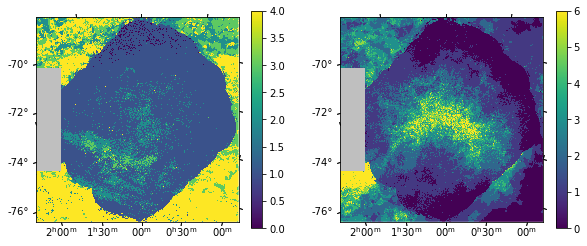

In [75]:
fig = plt.figure(0,[10,4])
ax = fig.add_subplot(121, projection=WCS(h_nhismc))
ax2 = fig.add_subplot(122, projection=WCS(h_nhismc))

im = ax.imshow(ncomp_mw, origin='lower', cmap=cmap_ncomp, vmax=4) #, vmax=400, cmap=cmap_nhi)
im2 = ax2.imshow(ncomp_smc, origin='lower', cmap=cmap_ncomp, vmax=6)  #, vmax=2200, cmap=cmap_nhi)

plt.colorbar(im, ax=ax)
plt.colorbar(im2, ax=ax2)

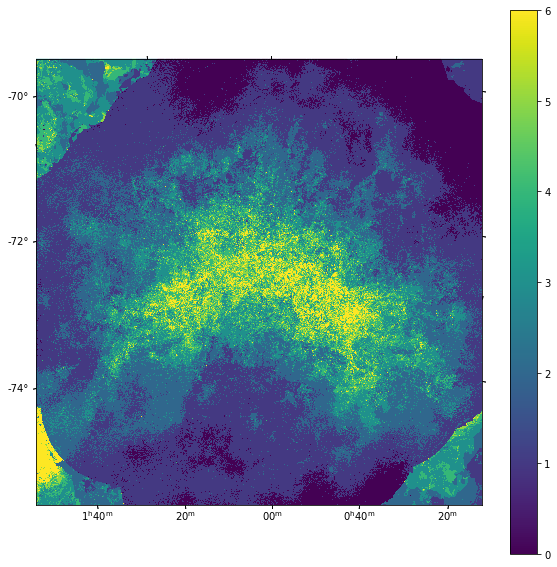

In [81]:
fig = plt.figure(0,[10,10])
ax = fig.add_subplot(111, projection=WCS(h_nhismc))

im = ax.imshow(ncomp_smc, origin='lower', cmap=cmap_ncomp, vmax=6)  #, vmax=2200, cmap=cmap_nhi)
ax.set_xlim(600,3800)
ax.set_ylim(600,3800)
plt.colorbar(im, ax=ax)

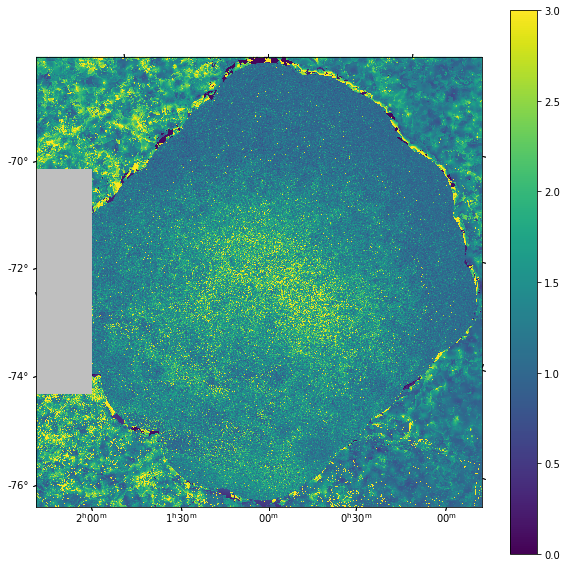

In [52]:
fig = plt.figure(0,[10,10])
ax = fig.add_subplot(111, projection=WCS(h_nhismc))

im = ax.imshow(rchi2, origin='lower', cmap=cmap_ncomp, vmax=3, vmin=0) #, vmax=2200, cmap=cmap_nhi)
plt.colorbar(im, ax=ax)

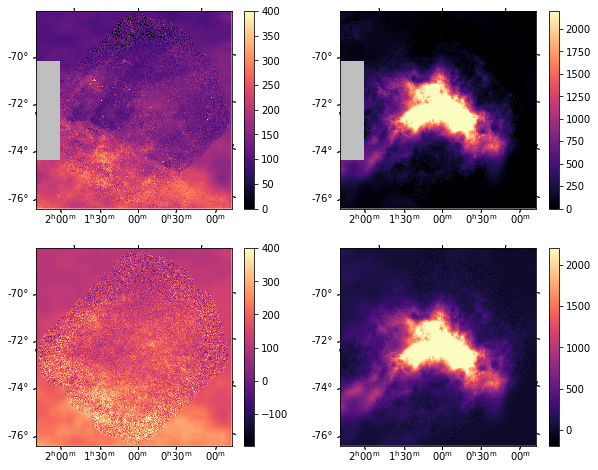

In [53]:
fig = plt.figure(0,[10,8])
ax = fig.add_subplot(221, projection=WCS(h_nhismc))
ax2 = fig.add_subplot(222, projection=WCS(h_nhismc))

ax3 = fig.add_subplot(223, projection=WCS(h_nhismc))
ax4 = fig.add_subplot(224, projection=WCS(h_nhismc))
                     
im = ax.imshow(nhimw, origin='lower', vmax=400, cmap=cmap_nhi)
im2 = ax2.imshow(nhismc, origin='lower', vmax=2200, cmap=cmap_nhi)

im3 = ax3.imshow(nhimw_tot, origin='lower', vmax=400, cmap=cmap_nhi)
im4 = ax4.imshow(nhismc_tot, origin='lower', vmax=2200, cmap=cmap_nhi)

plt.colorbar(im, ax=ax)
plt.colorbar(im2, ax=ax2)
plt.colorbar(im3, ax=ax3)
plt.colorbar(im4, ax=ax4)

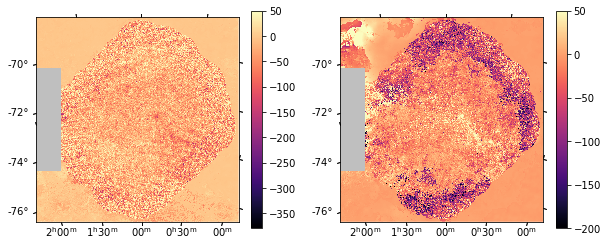

In [54]:
fig = plt.figure(0,[10,4])
ax = fig.add_subplot(121, projection=WCS(h_nhismc))
ax2 = fig.add_subplot(122, projection=WCS(h_nhismc))
                     
im = ax.imshow(nhimw-nhimw_tot, origin='lower', vmax=50, cmap=cmap_nhi) #, vmax=400)
im2 = ax2.imshow(nhismc-nhismc_tot, origin='lower', vmin=-200, vmax = 50, cmap=cmap_nhi) #, vmax=500)

plt.colorbar(im, ax=ax)
plt.colorbar(im2, ax=ax2)

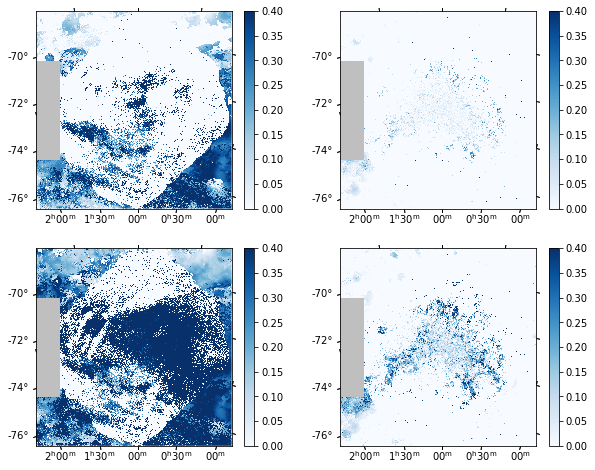

In [24]:
fig = plt.figure(0,[10,8])

ax = fig.add_subplot(221, projection=WCS(h_nhismc))
ax2 = fig.add_subplot(222, projection=WCS(h_nhismc))

ax3 = fig.add_subplot(223, projection=WCS(h_nhismc))
ax4 = fig.add_subplot(224, projection=WCS(h_nhismc))
                   
fcnm_max=0.4
im = ax.imshow(fcnmmw_7, origin='lower',vmax=fcnm_max, vmin=0, cmap=cmap_fcnm) #, vmax=100) #, vmax=400)
im2 = ax2.imshow(fcnmsmc_7, origin='lower', vmax=fcnm_max, vmin=0, cmap=cmap_fcnm) #, vmin=-200, vmax = 200) #, vmax=500)

im3 = ax3.imshow(fcnmmw_12, origin='lower',vmax=fcnm_max, vmin=0, cmap=cmap_fcnm) #, vmax=100) #, vmax=400)
im4 = ax4.imshow(fcnmsmc_12, origin='lower', vmax=fcnm_max, vmin=0, cmap=cmap_fcnm) #, vmin=-200, vmax = 200) #, vmax=500)

plt.colorbar(im, ax=ax)
plt.colorbar(im2, ax=ax2)
plt.colorbar(im3, ax=ax3)
plt.colorbar(im4, ax=ax4)

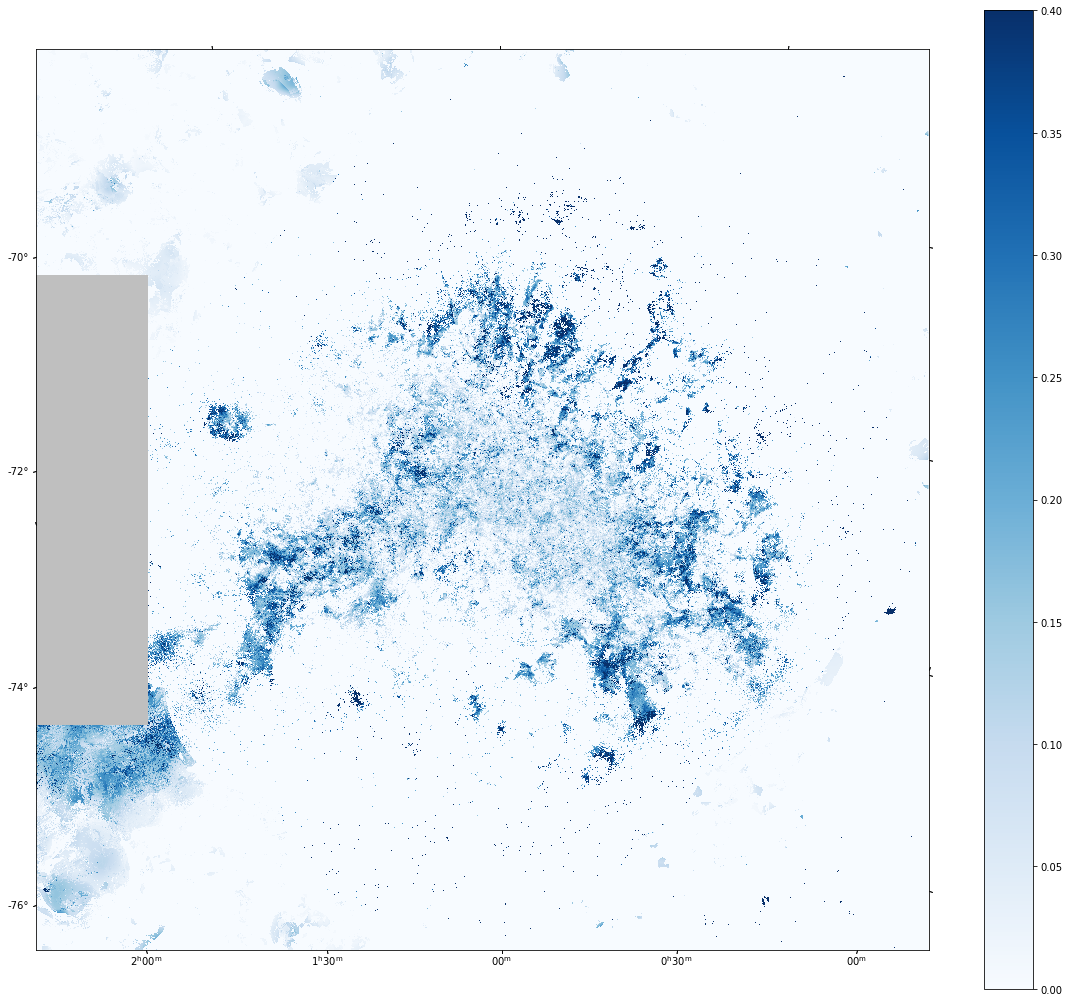

In [82]:
fig = plt.figure(0,[20,18])

ax = fig.add_subplot(111, projection=WCS(h_nhismc))


im = ax.imshow(fcnmsmc_12, origin='lower', vmax=0.4, vmin=0, cmap=cmap_fcnm) #, vmin=-200, vmax = 200) #, vmax=500)
plt.colorbar(im, ax=ax)

In [26]:
cube, header = fits.getdata('smc_HI_cube_askap.fits',header=True)
vel = make_velocity_axis(header)